In [7]:
import pandas as pd #data processing and CSV file read
df=pd.read_csv("C:/Users/smyou/Downloads/lab2/origins.csv")

#Obtain basic structure and information on dataset
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track ID          265 non-null    object 
 1   Track Name        265 non-null    object 
 2   Album Name        265 non-null    object 
 3   Artist Name(s)    265 non-null    object 
 4   Release Date      265 non-null    object 
 5   Duration (ms)     265 non-null    int64  
 6   Popularity        265 non-null    int64  
 7   Added By          265 non-null    object 
 8   Added At          265 non-null    object 
 9   Genres            241 non-null    object 
 10  Record Label      265 non-null    object 
 11  				Danceability  265 non-null    float64
 12  Energy            265 non-null    float64
 13  Key               265 non-null    int64  
 14  Loudness          265 non-null    float64
 15  Mode              265 non-null    int64  
 16  Speechiness       265 non-null    float64
 1

In [9]:
df.shape

(265, 23)

In [11]:
#Based on the data, I further decided to classify the playlist based on Tempo using three binned classifications (slow, medium and fast)

In [23]:
# Rename any malformed column (e.g., Danceability), just in case I need it later
df.columns = df.columns.str.strip()

# Create target variable
df['Tempo_Class'] = df['Tempo'].apply(categorize_tempo)

# Define features and target
y = df['Tempo_Class']
X = df.drop(columns=[
    'Track ID', 'Track Name', 'Album Name', 'Artist Name(s)', 'Release Date',
    'Added By', 'Added At', 'Genres', 'Tempo', 'Tempo_Class','Record Label', 'Key'])
X

,Duration (ms),Popularity,Danceability,Energy,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Time Signature
0,203106,55,0.591,0.611,-5.884,0,0.0454,0.0153,0.000000,0.0757,0.120,4
1,223405,39,0.789,0.555,-5.900,1,0.0410,0.0260,0.000135,0.2150,0.713,4
2,195700,63,0.572,0.807,-5.348,1,0.0574,0.0846,0.000000,0.0710,0.626,4
3,184546,19,0.688,0.616,-7.334,1,0.0451,0.0138,0.000461,0.1210,0.205,4
4,172760,38,0.515,0.410,-7.121,1,0.0411,0.5550,0.000041,0.1030,0.246,4
...,...,...,...,...,...,...,...,...,...,...,...,...
260,180381,75,0.621,0.415,-13.187,1,0.0543,0.3300,0.000112,0.0634,0.313,4
261,192317,75,0.619,0.610,-5.552,0,0.0298,0.0508,0.000000,0.0658,0.600,4
262,276026,30,0.578,0.459,-9.389,0,0.0420,0.6830,0.934000,0.1020,0.314,4
263,209077,71,0.467,0.247,-14.161,1,0.0314,0.9060,0.015700,0.1570,0.258,4


In [25]:
# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_encoded = pd.get_dummies(X)
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(X_encoded)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

#Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)
tempo_labels = le.classes_
X_train.shape, X_test.shape

((212, 12), (53, 12))

In [27]:
y_train.shape,y_test.shape

((212,), (53,))

In [29]:
df['Tempo_Class'].value_counts()

Tempo_Class
Medium    97
Fast      95
Slow      73
Name: count, dtype: int64

<Axes: xlabel='Tempo_Class'>

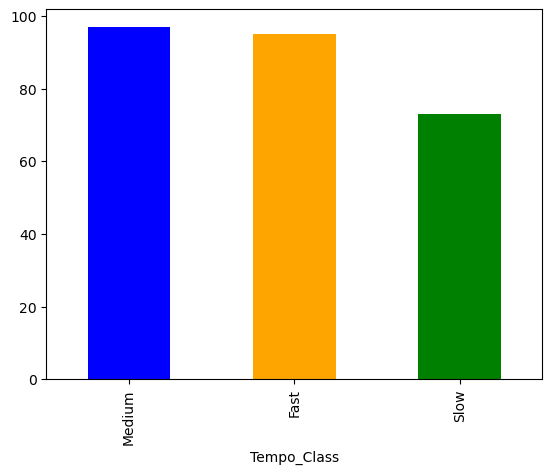

In [31]:
df['Tempo_Class'].value_counts().plot.bar(color=['blue','orange','green'])

In [21]:
# Train and evaluate models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'k-NN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=tempo_labels, output_dict=True)
    results[name] = report

# Convert reports to DataFrames
report_dfs_tempo = {model: pd.DataFrame(metrics).T for model, metrics in results.items()}

In [33]:
report_dfs_tempo

{'Logistic Regression':               precision    recall  f1-score    support
 Fast           0.666667  0.380952  0.484848  21.000000
 Medium         0.428571  0.428571  0.428571  21.000000
 Slow           0.100000  0.181818  0.129032  11.000000
 accuracy       0.358491  0.358491  0.358491   0.358491
 macro avg      0.398413  0.330447  0.347484  53.000000
 weighted avg   0.454717  0.358491  0.388701  53.000000,
 'k-NN':               precision    recall  f1-score    support
 Fast           0.538462  0.666667  0.595745  21.000000
 Medium         0.571429  0.571429  0.571429  21.000000
 Slow           0.333333  0.181818  0.235294  11.000000
 accuracy       0.528302  0.528302  0.528302   0.528302
 macro avg      0.481074  0.473304  0.467489  53.000000
 weighted avg   0.508950  0.528302  0.511300  53.000000,
 'Decision Tree':               precision    recall  f1-score    support
 Fast           0.444444  0.380952  0.410256  21.000000
 Medium         0.562500  0.428571  0.486486  21.00000

<Figure size 1000x600 with 0 Axes>

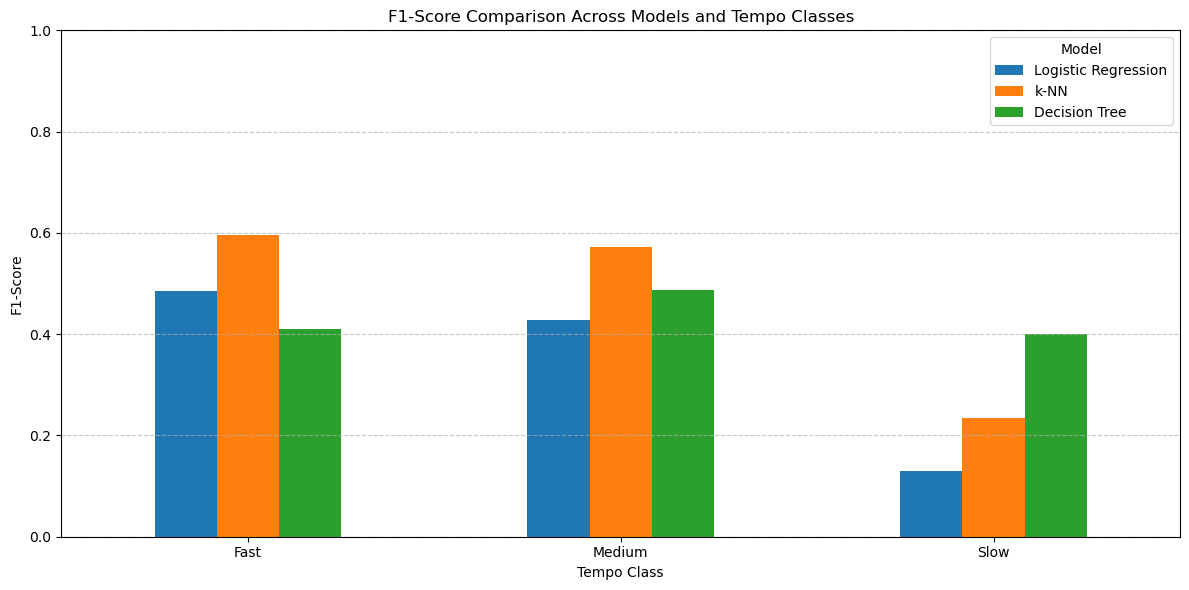

In [35]:
import matplotlib.pyplot as plt

# Extract F1-scores for each class and model
f1_scores = {
    model: df.loc[tempo_labels, 'f1-score'] for model, df in report_dfs_tempo.items()
}

# Create a DataFrame for comparison
f1_df = pd.DataFrame(f1_scores)

# Plot the F1-scores
plt.figure(figsize=(10, 6))
f1_df.plot(kind='bar', figsize=(12, 6))
plt.title('F1-Score Comparison Across Models and Tempo Classes')
plt.ylabel('F1-Score')
plt.xlabel('Tempo Class')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(title='Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()